## Exploring Exoplanets with Data Science
Authors: James Cleaver, Lauren McKnight, Maria Pettyjohn

> **Before you begin, click the yellow squiggle button in the tool bar above. This will open a version of the activity without visible code!**

In this activity you will
- use data to identify patterns and relationships in data, and draw conclusions, and
- explain how data is used by scientists to model and predict scientific phenomena.

Throughout the activity you will see emojis, including
- traffic lights 🚦, signalling you to stop and complete a task, and 
- ❗labelling important concepts.

In this activity, you will be exploring NASA's Exoplanet Archive that contains data about the planets we have discovered beyond our Solar System! The activity is structured as follows:
1. **First Look at the Exoplanet Dataset**: Take a brief look at the dataset in the form of a data table and learn what **types** of data you will be working with in this activity.
2. **Exploring the data visually - Single Variable**: Next you will be doing the first step of exploratory data analysis and plotting one variable at a time.
3. **Transforming the Data - Scaling**: In the last part, you will encounter some data that does not look so nice and so you will learn how to **scale** you data to make better use of it!
4. **Exploring Patterns in the Data - Two Variable**: Using the data visualisation and data scaling skills you learned in the last section, you will categorise the planets in the data set by finding patterns in two variable graphs. Here you will see how our solar system fits into the current population of discovered exoplanets!
5. **Bonus: Search for Tatooine**: Filter the dataset to see if there is a Tatooine-like exoplanet hiding in the data!


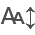

In [1]:
'''
This code is setting up a toolbox before starting the notebook.
Each line brings in a different tool that helps with working with data, numbers, and
creating visuals.

Here's what each tool does:

1. Pandas (pd) – This is like a super-powered spreadsheet.
                 It helps organize and analyze data in tables, similar to Excel.

2. NumPy (np) – This adds extra math abilities, especially for working with numbers
                and calculations.

3. Matplotlib (plt) – This is a basic drawing tool for making charts and graphs.

5. ipywidgets (widgets) – This adds interactive elements, like sliders or buttons, to make data
                          exploration more hands-on.

6. IPython Display – This helps show things clearly in a notebook-style environment, like
                     refreshing the screen or displaying results nicely.
            
'''

import numpy as np #standard import to add to our maths toolbox
import pandas as pd #data science tools
import matplotlib.pyplot as plt #graphing tools
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact, interactive
from itables import init_notebook_mode
import itables

init_notebook_mode(all_interactive=True) #make tables interactive
itables.options.maxBytes = "256KB"

layout = widgets.Layout(width='auto') #set width

# First Look at the Exoplanet Dataset

First, let's take a look at the Exoplanet data set in the form of a table.

In [2]:
'''
Whether data is generated in your own lab, shared by a collaborator, or accessed from a public database,
it needs to be brought into our notebook to be worked with. This is commonly done by loading a .csv file
just like you would use for excel.

For this activity, we work with a publically available data set of animal traits from https://animaltraits.org/. 
Once the file is opened, we read the file into a Pandas dataframe and take a look.

Here's what each line of code does:
1. Open the file
    This line opens the downloaded file and reads it into a format that the computer
    can work with. It uses the Pandas tool (from earlier) to turn the file into a table
    of data.

'''

# load in data set from data file
df = pd.read_csv('confirmedplanets.csv')

In [3]:
'''
This code is setting up the data table to only include columns with data of interest for the rest of the notebook.

Here's what each line of code does:
1. Make a List of Column Names
    The first line creates a list called columns_to_include. This list contains the names of the columns 
    (like the year of discovery or the planet name) that we want to work with from a bigger dataset called df.

2. Pick Just Those Columns from the Dataset
    The second line takes only the columns listed in columns_to_include from the original dataset df. It 
    makes a copy of that smaller piece and stores it in a new variable called planets_df.

    Think of it like cutting out just the pages you need from a big book and making a photocopy of them.

3. Rename the Dataframe columns
    The column names from the NASA archive are hard to interpret, so we rename them to make them easier to read.

4. Show the New Table
    The last line, display(planets_df), shows the new table (called a DataFrame) so you can see what it 
    looks like.
'''

# Listing the desired columns
columns_to_include = ['pl_name', 'disc_year', 'discoverymethod', 'disc_facility', 'ra', 'dec', 'sy_pnum', 'sy_snum', 'pl_rade', 'pl_masse', 'pl_orbsmax', 'pl_orbper']

# Creating a copy of the subset with categorical columns
planets_df = df[columns_to_include].copy()

# Renaming the columns to have easier to understand names
planets_df = planets_df.rename(columns={'pl_name':'PlanetName', 'disc_year':'YearofDiscovery', 'discoverymethod':'DiscoveryMethod', 'disc_facility':'DiscoveryTelescope', 
                   'ra':'RightAscension', 'dec':'Declination', 'sy_pnum':'NumPlanets_in_System','sy_snum':'NumStars_in_System',
                  'pl_rade':'Planet_Radius_Earth', 'pl_masse':'Planet_Mass_Earth', 'pl_orbsmax':'DistancefromStar','pl_orbper':'OrbitalPeriod'})

display(planets_df)

Loading ITables v2.4.4 from the init_notebook_mode cell... (need help?)


You can see that this table contains a eleven unique columns, corresponding to eleven unique variables of interest. These variables take the form of:

- **Categorical Data**: Data in the form of alphanetical text labels, such as the **DiscoveryMethod**, **PlanetName**, and **DiscoveryTelescope**.
- **Numerical Data:** Data in the form of numbers, including decimal numbers.
- **NaN:** "Not a Number" label that indicates that data is missing for that specific column and row of data.

> 🚦Explore the columns using the drop-down menu below.

In [4]:
## THE FOLLOWING TEXT CREATES THE INTERACTIVE DROP-DOWN MENU ##  

def explore_widget(column_name):
    dict_column = {'PlanetName':'Discovered planets are usually named after the the host star plus a lower case letter. The lower case letter indicates the order in which the planet was discovered.',
                  'YearofDiscovery':'The year the planet was discovered.',
                  'DiscoveryMethod':'The method by which the planet was first identified, such as by the transit method.',
                  'DiscoveryTelescope':'The telescope used to discover the planet.',
                  'RightAscension':'Together, Right Ascension and Declination map the location of a planet on the night sky. Right Ascension is the angle along the equator of the Earth in degrees.',
                  'Declination':'Together, Right Ascension and Declination map the location of a planet on the night sky. Declination is the angle from the horizon up to the vertical above your head in degrees.',
                  'NumPlanets_in_System':'Number of planets discovered in the system.',
                  'NumStars_in_System':'Number of stars in the system.',
                  'Planet_Radius_Earth':'The planet radius in Earth radii.',
                  'Planet_Mass_Earth':'The planet mass in Earth masses.',
                  'DistancefromStar':'Distance the planet is from its host star in astronomical units.',
                  'OrbitalPeriod':'Time the planet takes to make a complete orbit around the host star in days (length of year).'}
    print(dict_column[column_name])
         

column_widget = widgets.Dropdown(
    options=['PlanetName', 'YearofDiscovery', 'DiscoveryMethod',
       'DiscoveryTelescope', 'RightAscension', 'Declination',
       'NumPlanets_in_System', 'NumStars_in_System', 'Planet_Radius_Earth',
       'Planet_Mass_Earth', 'DistancefromStar', 'OrbitalPeriod'],
    value='PlanetName',
    description='Column:',
)

interact(explore_widget, column_name=column_widget)


interactive(children=(Dropdown(description='Column:', options=('PlanetName', 'YearofDiscovery', 'DiscoveryMeth…

<function __main__.explore_widget(column_name)>

## Exploring the data visually - Single Variable

Viewing the data table in the form above is a lot! So instead, scientists take the data from the data table and graph the data to make it more understandable. Each column is a **variable**  that you will explore in this section.

Viewing the distributions of variables, and relationships between them, is best done visually. This is all part of **"Exploratory Data Analysis"**.

Exploratory Data Analysis is an step-by-step and interactive process, often requiring you to go back and forth, adjusting your approach as you learn more about your data. The goal is to become familiar with the data, prepare it for further analysis, and possibly generate hypotheses to test.

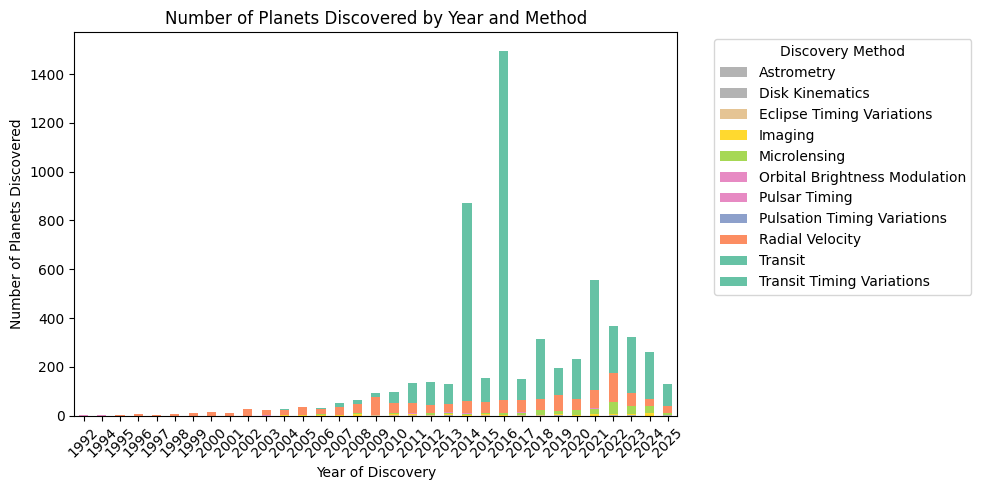

In [5]:
nasa_planets_grouped = planets_df.groupby(['YearofDiscovery', 'DiscoveryMethod']).size().unstack(fill_value=0) # Group the data by year and method, then count the number of discoveries
# This gives us the number of planets discovered per year for each method

nasa_planets_grouped.plot(kind='bar', stacked=True, figsize=(10,5), colormap='Set2_r') # Plot the data as a stacked bar chart


plt.title('Number of Planets Discovered by Year and Method') # Set the title 
plt.xlabel('Year of Discovery') # Set the x label
plt.ylabel('Number of Planets Discovered') # Set the y label

plt.xticks(rotation=45) # Rotate the x-axis labels for better readability

plt.legend(title='Discovery Method', bbox_to_anchor=(1.05, 1), loc='upper left') # Enhance the legend

plt.tight_layout() # Show the plot with a tight layout to ensure everything fits well
plt.show() # show the plot


You can see in the plot above that the first exoplanet was discovered in 1992 by looking at how the planet's gravity causes its host star to wobble (radial velcocity method). Ever since the first discovery, astronomers have continously discovered more exoplanets, with approximately 5000 discovered to date!

A majority of the detections are made with telescopes in space with a method called "transit." For these types of discoveries, astronomers look for when the planet passes in front of its host star, causing the light to dim ever so slightly. The transit method can only detect exoplanets whose orbits are inline with ours!

Now that you have an idea of the history of exoplanet discovery, lets jump right into the data and explore distributions of the different data we have on the discovered exoplanets.

> 🚦 Explore each numerical data column with the interactive plot below.

In [6]:
def single_variable_plot_widget(variable_option, buckets_option):
    '''
    This code creates a graph that shows how often different values appear in a dataset. 
    Specifically, it shows the distribution of a trait like body mass or brain size in animals.

    Here's what each line of code does:
    1. Pick a Label for the Graph
        The code starts with a small dictionary that translates short names like 'RightAscension' into 
        full labels like "Right Ascenion (degrees)". This makes the graph easier to read and understand.

    2. Choose What to Show
        Based on what the user selects (like 'RightAscenion'), the code picks the right 
        label and the right data from a table called planets_df.

    3. Make the Graph
        The code creates a histogram, which is a type of graph that shows how often different values appear.

    4. Add Labels and Title
        It adds a label to the x-axis (like "Right Ascenion (degrees)").
        It adds a label to the y-axis ("Frequency"), which means how many times each value range appears.
        It adds a title to the graph, like "Distribution of Right Ascenion (degrees)".

    5. Show the Graph
        Finally, it displays the graph so the user can see it.
    '''
    
    labels_list = {'RightAscension':'Right Ascension (degrees)', 'Declination':'Declination (degrees)',
       'NumPlanets_in_System':'Number of Planets in System', 'NumStars_in_System':'Number of Stars in System', 'Planet_Radius_Earth':'Planet Radius (Earth Radii)',
       'Planet_Mass_Earth':'Planet Mass (Earth Mass)', 'DistancefromStar':'Distance from Host Star (Astronomical Units)', 'OrbitalPeriod':'Length of Year (Earth days)'} # pick a label for the graph
    label = labels_list[variable_option] # choose what to show

    plt.hist(planets_df[variable_option], bins=int(buckets_option)) # make the graph   
    plt.xlabel(label) # add x label
    plt.ylabel("Frequency") # add y label
    plt.title(f"Distribution of {label}") # add title
    plt.show() # show the graph

## THE FOLLOWING TEXT CREATES THE DROPDOWN MENUS AND INTERACTIVTY OF THE GRAPHS ##    

variable_widget = widgets.Dropdown(options=['RightAscension', 'Declination',
       'NumPlanets_in_System', 'NumStars_in_System', 'Planet_Radius_Earth',
       'Planet_Mass_Earth', 'DistancefromStar','OrbitalPeriod'], 
                                   description='Choose a variable to plot:',
                                   align_items='stretch', 
                                    style= {'description_width': 'initial'})

buckets_widget = widgets.FloatText(value=20,
                                description='Enter the number of buckets to divide your data into:',
                                disabled=False,
                                   align_items='stretch', 
                                    style= {'description_width': 'initial'},
                                   layout = layout)

widgets.interact(single_variable_plot_widget, variable_option=variable_widget, buckets_option=buckets_widget)

interactive(children=(Dropdown(description='Choose a variable to plot:', options=('RightAscension', 'Declinati…

<function __main__.single_variable_plot_widget(variable_option, buckets_option)>

For the above graph, you can choose a **variable** to plot and the number of **buckets** the data is split into. 

> 🚦 How does your choice of number of buckets change the distribution of data? Does it change the distribution for all variables?

In [7]:
## THE FOLLOWING TEXT CREATES THE INTERACTIVE TEXTBOX ##   

def observations(obs):
    print(obs)


obs_widget = widgets.Text(
    value="",
    description='Type your observations here (1-2 sentences):',
    disabled=False,
    align_items='stretch', 
    style= {'description_width': 'initial'},
    layout=layout
)

widgets.interact(observations,obs=obs_widget)

interactive(children=(Text(value='', description='Type your observations here (1-2 sentences):', layout=Layout…

<function __main__.observations(obs)>

# Transforming the Data - Scaling 
Right now, the x-axis of the plot increases in equal increments. When an axis of a graph has evenly spaced increments, we call this **linear scaling** in data science.

As we hinted at before, physical data is often squished at the left-side of a plot that has **linear scaling**. For example, the length of a year of most discovered planets have short years on the order of 10s of Earth days, with very few having long years on the order of 100s to 100s of Earth days.

> 🚦 Does our Solar System follow the same pattern?

The fact that most of the discovered planets have short lengths of years is not actually due to nature, but how scientists detect exoplanets! Right now, our instruments are more sensitive to planets that have orbits close to their host star and a short length of year, rather than planets whose orbits are far-away from their host star with a long length of year.

The **linear scaling** of the data makes it very difficult to compare planets with very different lengths of year or distances from their host star. A way around this is to apply **logarithmic scaling** that makes it easier to compare things that are very different in size or length.

**Logarithmic scaling** changes the increments from being equal increments to increments of 1, 10, 100, 1000, and so on. Therefore, the increments on the x-axis increase by 10-times each increment from left to right.

>❗Usually, logarithmic increments are written as powers of 10 so that 10<sup>0</sup>=1, 10<sup>1</sup>=10, 10<sup>2</sup>=100, and so on, with decimal numbers taking the form of 10<sup>-2</sup>=0.01 and 10<sup>-1</sup>=0.1, for example.
>
Lets see how that changes how your plot looks!

In [8]:
def single_variable_plot_log_widget(variable_option, buckets_option, scaling_option):
    '''
    This code creates a graph that shows how a variable (like OrbitalPeriod) is spread out across the discovered exoplanets. 
    It gives you two ways to look at the data:
        - Linear scale: shows the actual values.
        - Logarithmic scale: shows the values in powers of 10, which is useful when the numbers vary a lot.

    Here's what each line of code does:
    1. Pick a Label for the Graph
        The code starts with a small dictionary that translates short names like 'OrbitalPeriod' into 
        full labels like "Orbital Period (Earth days)". This makes the graph easier to read and understand.

    2. Choose What to Show
        Based on what the user selects (like 'OrbitalPeriod'), the code picks the right 
        label and the right data from a table called planets_df.

    3. Choose How to Scale the Data
        The user picks a scaling option: either 'linear' or 'logarithmic'.
        This choice affects how the graph looks.

    4. Make the Graph
        If the user chooses linear, the graph shows the actual values (e.g., 5 , 10 , 15).
        If the user chooses logarithmic, the graph shows the values as powers of 10 (e.g., 10¹, 10²), 
        which helps when the numbers range from very small to very large.

    5. Add Labels and Title
        It adds a label to the x-axis (like "Orbital Period (Earth days)".
        It adds a label to the y-axis ("Frequency"), which means how many times each value range appears.
        It adds a title to the graph, like "Distribution of Orbital Period (Earth days)".

    6. Show the Graph
        Finally, it displays the graph so the user can see it.
    '''
    
    labels_list = {'RightAscension':'Right Ascension (degrees)', 'Declination':'Declination (degrees)',
       'NumPlanets_in_System':'Number of Planets in System', 'NumStars_in_System':'Number of Stars in System', 'Planet_Radius_Earth':'Planet Radius (Earth Radii)',
       'Planet_Mass_Earth':'Planet Mass (Earth Mass)', 'DistancefromStar':'Distance from Host Star (Astronomical Units)', 'OrbitalPeriod':'Length of Year (Earth days)'} # pick a label for the graph
    label = labels_list[variable_option] # choose what to show
    
    if scaling_option == 'linear': # choose how to scale the data
        plt.hist(planets_df[variable_option], bins=int(buckets_option)) # make the graph
        plt.xlabel(label) # add x label
        plt.ylabel("Frequency") # add y label
        plt.title(f"Linear Distribution of {label}") # add title
        plt.show() # show the graph
    elif scaling_option == 'logarithmic': # choose how to scale the data
        plt.hist(np.log10(planets_df[variable_option]), bins=int(buckets_option)) # make the graph
        plt.xlabel(label+' in $10^x$') # add x label
        plt.ylabel("Frequency") # add y label
        plt.title(f"Logarithmic Distribution of {label} in $10^x$") # add title
        plt.show() # show the graph
    return

## THE FOLLOWING TEXT CREATES THE DROPDOWN MENUS AND INTERACTIVTY OF THE GRAPHS ##    

variable_widget = widgets.Dropdown(options=['RightAscension', 'Declination',
       'NumPlanets_in_System', 'NumStars_in_System', 'Planet_Radius_Earth',
       'Planet_Mass_Earth', 'DistancefromStar','OrbitalPeriod'], 
                                   description='Choose a variable to plot:',
                                   align_items='stretch', 
                                    style= {'description_width': 'initial'})
buckets_widget = widgets.FloatText(value=20,
                                description='Enter the number of buckets to divide your data into:',
                                disabled=False,
                                   align_items='stretch', 
                                    style= {'description_width': 'initial'},
                                  layout=layout)
scaling_widget = widgets.Dropdown(options=['linear', 'logarithmic'], 
                                   description='Choose type of scaling:',
                                   align_items='stretch', 
                                    style= {'description_width': 'initial'})

widgets.interact(single_variable_plot_log_widget, variable_option=variable_widget, buckets_option=buckets_widget, scaling_option=scaling_widget)

interactive(children=(Dropdown(description='Choose a variable to plot:', options=('RightAscension', 'Declinati…

<function __main__.single_variable_plot_log_widget(variable_option, buckets_option, scaling_option)>

> 🚦 How has the distribution changed now that your have changed from linear scaling to logarithmic scaling? What patterns are you seeing?

In [9]:
## THE FOLLOWING TEXT CREATES THE INTERACTIVE TEXTBOX ##   

def observations(obs):
    print(obs)


obs_widget = widgets.Text(
    value="",
    description='Type your observations here (1-2 sentences):',
    disabled=False,
    align_items='stretch', 
    style= {'description_width': 'initial'},
    layout=layout
)

widgets.interact(observations,obs=obs_widget)

interactive(children=(Text(value='', description='Type your observations here (1-2 sentences):', layout=Layout…

<function __main__.observations(obs)>

# Exploring Patterns in the Data - Two Variable
After single variable exploratory data analysis, two variable analysis is helpful for spotting relationships between variables!

A current, very active area of research is understanding the types of exoplanets that exist in our galaxy. 

> 🚦 List the two types of planets that we have in our Solar System.

In [10]:
## THE FOLLOWING TEXT CREATES THE INTERACTIVE TEXTBOX ##   

def observations(obs):
    print(obs)


obs_widget = widgets.Text(
    value="",
    description='List the two types of planets here:',
    disabled=False,
    align_items='stretch', 
    style= {'description_width': 'initial'},
    layout=layout
)

widgets.interact(observations,obs=obs_widget)

interactive(children=(Text(value='', description='List the two types of planets here:', layout=Layout(width='a…

<function __main__.observations(obs)>

In our dataset, we have access to four variables that can help us classify the planets in the NASA archive:

1. Planet_Radius_Earth: The planet radius in Earth radii. 
2. Planet_Mass_Earth: The planet mass in Earth masses. 
3. DistancefromStar: Distance the planet is from its host star in astronomical units.
4. OrbitalPeriod: Time the planet takes to make a complete orbit around the host star in days (length of year).


> 🚦Explore combinations of these four variables and identify the Earth-like planets and the Jupiter-like planets on the plot.

In [11]:
def two_variable_plot_log_widget(variable_optionx, variable_optiony, scaling_option):  
    '''
    This code creates a graph of 'brain size' versus 'body mass' given a user chosen option of rank and item within that rank. 
    It gives you two ways to look at the data:
        - Linear scale: shows the actual values.
        - Logarithmic scale: shows the values in powers of 10, which is useful when the numbers vary a lot.

    Here's what each line of code does:
    1. Pick a Label for the Graph
        The code starts with a small dictionary that translates short names like 'body mass' into 
        full labels like "Body Mass (kilograms)". This makes the graph easier to read and understand.

    2. Choose What to Show
        Based on what the user selects (like 'body mass' or 'brain size'), the code picks the right 
        label and the right data from a table called traits_df.

    3. Filter remove 'Not a Number' Values
        This code removes NaN values from the data table to avoid problems with plotting.

    4. Print the Number of Animals Given the Options
        Based on what the user selects (like 'class' and 'reptilia'), the code prints the number of animals in 
        that category.
        
    5. Print a notice if no data to plot
        This code checks if the data table is empty after filterind and then prints a notification if the
        data table is empty.

    6. Choose How to Scale the Data
        The user picks a scaling option: either 'linear' or 'logarithmic'.
        This choice affects how the graph looks.

    7. Make the Graph
        If the user chooses linear, the graph shows the actual values (e.g., 5 kg, 10 kg, 15 kg).
        If the user chooses logarithmic, the graph shows the values as powers of 10 (e.g., 10¹, 10²), 
        which helps when the numbers range from very small to very large.

    8. Add Labels and Title
        It adds a label to the x-axis (like "Body Mass (kilograms)").
        It adds a label to the y-axis ("Frequency"), which means how many times each value range appears.
        It adds a title to the graph, like "Distribution of Body Mass (kilograms)".

    9. Show the Graph
        Finally, it displays the graph so the user can see it.
    '''
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(1, 1, 1)
    labels_list = {'Planet_Radius_Earth':'Planet Radius (Earth Radii)',
       'Planet_Mass_Earth':'Planet Mass (Earth Mass)', 'DistancefromStar':'Distance from Host Star (Astronomical Units)', 'OrbitalPeriod':'Length of Year (Earth days)'} # pick a label for the graph
    labelx = labels_list[variable_optionx] # choose what to show on the x-axis
    labely = labels_list[variable_optiony] # choose what to show on the y-axis
    
    filtered_df = planets_df.dropna(subset=[variable_optionx, variable_optiony]) #Filter remove 'Not a Number' Values

    print('There are '+str(len(filtered_df))
          +' planets in the dataset.') # print the number of planets given the chosen variables


    if filtered_df.empty: # Ensure there are enough rows to plot 
        print("No overlapping data available for the selected variables.") # print if there are not data to plot
    
    if scaling_option == 'linear': # choose how to scale data
        ax.plot(filtered_df[variable_optionx], 
                 filtered_df[variable_optiony], 'ko', markersize=5, alpha = 0.25) # make the graph           
        ax.set_xlabel(labelx) # add x label
        ax.set_ylabel(labely) # add y label
        ax.set_title(f"Two Variable Linear Distribution") # add title
        
        plt.show() # show graph
    elif scaling_option == 'logarithmic': # choose how to scale data
        ax.plot(filtered_df[variable_optionx],
                 filtered_df[variable_optiony], 'ko', markersize=5, alpha = 0.25) # make the graph
        ax.set_xscale("log") # set scale of x-axis to logarithmic
        ax.set_yscale("log") # set scale of y-axis to logarithmic
        ax.set_xlabel(labelx) # add x label
        ax.set_ylabel(labely) # add y label
        ax.set_title(f"Two Variable Logarithmic Distribution in $10^x$") # add title
        plt.show() # show graph
    return

## THE FOLLOWING TEXT CREATES THE DROPDOWN MENUS AND INTERACTIVTY OF THE GRAPHS ##    

variable_widgetx = widgets.Dropdown(options=['Planet_Radius_Earth',
       'Planet_Mass_Earth', 'DistancefromStar','OrbitalPeriod'], 
                                   description='Choose x-axis variable to plot:',
                                   align_items='stretch', 
                                    style= {'description_width': 'initial'})

variable_widgety = widgets.Dropdown(options=['Planet_Radius_Earth',
       'Planet_Mass_Earth', 'DistancefromStar','OrbitalPeriod'], 
                                   description='Choose y-axis variable to plot:',
                                   align_items='stretch', 
                                    style= {'description_width': 'initial'})

buckets_widget = widgets.FloatText(value=20,
                                description='Enter the number of buckets to divide your data into:',
                                disabled=False,
                                   align_items='stretch', 
                                    style= {'description_width': 'initial'},
                                  layout=layout)
scaling_widget = widgets.Dropdown(options=['linear', 'logarithmic'], 
                                   description='Choose type of scaling:',
                                   align_items='stretch', 
                                    style= {'description_width': 'initial'})



widgets.interact(two_variable_plot_log_widget, variable_optionx=variable_widgetx, variable_optiony=variable_widgety, 
                 scaling_option=scaling_widget)

interactive(children=(Dropdown(description='Choose x-axis variable to plot:', options=('Planet_Radius_Earth', …

<function __main__.two_variable_plot_log_widget(variable_optionx, variable_optiony, scaling_option)>

> 🚦Choose a combination of x-axis, y-axis, and scaling options. Do the data points show any patterns or grouping?

In [12]:
## THE FOLLOWING CREATES A HINT BUTTON TO GUIDE THE STUDENT ##

import matplotlib.image as mpimg

button = widgets.Button(description="Click Me for a Hint!")
output = widgets.Output()

display(button, output)

def on_button_clicked(_):
    with output:
        print("Plot OrbitalPeriod on the x-axis and Planet Radius on the y-axis with logarithmic scaling. \n The data points bunch together in three distinct regions!")
        img = mpimg.imread('exoplanetdistro.png')
        fig, ax = plt.subplots()
        ax.axis('off')
        ax.imshow(img) 
        plt.show()

button.on_click(on_button_clicked)

Button(description='Click Me for a Hint!', style=ButtonStyle())

Output()

### How does our Solar System fit in?
Now, let's get our bearings and look at where our Solar System fits in!

In [13]:
def two_variable_plot_log_widget(variable_optionx, variable_optiony, scaling_option):  
    '''
    This code creates a graph of 'brain size' versus 'body mass' given a user chosen option of rank and item within that rank. 
    It gives you two ways to look at the data:
        - Linear scale: shows the actual values.
        - Logarithmic scale: shows the values in powers of 10, which is useful when the numbers vary a lot.

    Here's what each line of code does:
    1. Pick a Label for the Graph
        The code starts with a small dictionary that translates short names like 'body mass' into 
        full labels like "Body Mass (kilograms)". This makes the graph easier to read and understand.

    2. Choose What to Show
        Based on what the user selects (like 'body mass' or 'brain size'), the code picks the right 
        label and the right data from a table called traits_df.

    3. Filter remove 'Not a Number' Values
        This code removes NaN values from the data table to avoid problems with plotting.

    4. Print the Number of Animals Given the Options
        Based on what the user selects (like 'class' and 'reptilia'), the code prints the number of animals in 
        that category.
        
    5. Print a notice if no data to plot
        This code checks if the data table is empty after filterind and then prints a notification if the
        data table is empty.

    6. Choose How to Scale the Data
        The user picks a scaling option: either 'linear' or 'logarithmic'.
        This choice affects how the graph looks.

    7. Make the Graph
        If the user chooses linear, the graph shows the actual values (e.g., 5 kg, 10 kg, 15 kg).
        If the user chooses logarithmic, the graph shows the values as powers of 10 (e.g., 10¹, 10²), 
        which helps when the numbers range from very small to very large.

    8. Add Labels and Title
        It adds a label to the x-axis (like "Body Mass (kilograms)").
        It adds a label to the y-axis ("Frequency"), which means how many times each value range appears.
        It adds a title to the graph, like "Distribution of Body Mass (kilograms)".

    9. Show the Graph
        Finally, it displays the graph so the user can see it.
    '''
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(1, 1, 1)
    
    solar_system_dict = {'Earth':[1.0,1.0,1.0,365],'Mercury':[0.383,0.055,0.467,87.89], 'Venus':[0.95,0.815,0.73,224.701],
                         'Mars':[0.533,0.107,1.38,687], 'Jupiter':[11.209,317.8,4.95,4332],'Saturn':[9.14,95.15,9.04,10775],
                        'Uranus':[4,14.54,20.09,30689], 'Neptune':[3.883,17.147,30.33,60195]}
    variable_dict = {'Planet_Radius_Earth':0,'Planet_Mass_Earth':1,'DistancefromStar':2,'OrbitalPeriod':3}

    planets_solsys_list = list(solar_system_dict.keys())

    planet_labels_dict = {'Earth':'E', 'Mercury':'Me', 'Venus':'V', 'Mars':'Ma', 'Jupiter':'J', 'Saturn':'S', 'Uranus':'U', 'Neptune':'N'}

    
    labels_list = {'Planet_Radius_Earth':'Planet Radius (Earth Radii)',
       'Planet_Mass_Earth':'Planet Mass (Earth Mass)', 'DistancefromStar':'Distance from Host Star (Astronomical Units)', 'OrbitalPeriod':'Length of Year (Earth days)'} # pick a label for the graph
    labelx = labels_list[variable_optionx] # choose what to show on the x-axis
    labely = labels_list[variable_optiony] # choose what to show on the y-axis
    
    filtered_df = planets_df.dropna(subset=[variable_optionx, variable_optiony]) #Filter remove 'Not a Number' Values

    print('There are '+str(len(filtered_df))
          +' planets in the dataset.') # print the number of planets given the chosen variables


    if filtered_df.empty: # Ensure there are enough rows to plot 
        print("No overlapping data available for the selected variables.") # print if there are not data to plot
    
    if scaling_option == 'linear': # choose how to scale data
        ax.plot(filtered_df[variable_optionx], 
                 filtered_df[variable_optiony], 'ko', markersize=5, alpha = 0.25) # make the graph      

        for planet in planets_solsys_list:
            x_place = variable_dict[variable_optionx]
            y_place = variable_dict[variable_optiony]
            ax.plot(solar_system_dict[planet][x_place],solar_system_dict[planet][y_place],'mo',markersize=5)
            ax.text(solar_system_dict[planet][x_place],solar_system_dict[planet][y_place], planet_labels_dict[planet])
        
        ax.set_xlabel(labelx) # add x label
        ax.set_ylabel(labely) # add y label
        ax.set_title(f"Two Variable Linear Distribution") # add title
        
        plt.show() # show graph
    elif scaling_option == 'logarithmic': # choose how to scale data
        ax.plot(filtered_df[variable_optionx],
                 filtered_df[variable_optiony], 'ko', markersize=5, alpha = 0.25) # make the graph
        for planet in planets_solsys_list:
            x_place = variable_dict[variable_optionx]
            y_place = variable_dict[variable_optiony]
            ax.plot(solar_system_dict[planet][x_place],solar_system_dict[planet][y_place],'mo',markersize=5)
            ax.text(solar_system_dict[planet][x_place],solar_system_dict[planet][y_place], planet_labels_dict[planet])
            
        ax.set_xscale("log") # set scale of x-axis to logarithmic
        ax.set_yscale("log") # set scale of y-axis to logarithmic
        ax.set_xlabel(labelx) # add x label
        ax.set_ylabel(labely) # add y label
        ax.set_title(f"Two Variable Logarithmic Distribution in $10^x$") # add title
        plt.show() # show graph
    return

## THE FOLLOWING TEXT CREATES THE DROPDOWN MENUS AND INTERACTIVTY OF THE GRAPHS ##    

variable_widgetx = widgets.Dropdown(options=['Planet_Radius_Earth',
       'Planet_Mass_Earth', 'DistancefromStar','OrbitalPeriod'], 
                                   description='Choose x-axis variable to plot:',
                                   align_items='stretch', 
                                    style= {'description_width': 'initial'})

variable_widgety = widgets.Dropdown(options=['Planet_Radius_Earth',
       'Planet_Mass_Earth', 'DistancefromStar','OrbitalPeriod'], 
                                   description='Choose y-axis variable to plot:',
                                   align_items='stretch', 
                                    style= {'description_width': 'initial'})

buckets_widget = widgets.FloatText(value=20,
                                description='Enter the number of buckets to divide your data into:',
                                disabled=False,
                                   align_items='stretch', 
                                    style= {'description_width': 'initial'},
                                  layout=layout)
scaling_widget = widgets.Dropdown(options=['linear', 'logarithmic'], 
                                   description='Choose type of scaling:',
                                   align_items='stretch', 
                                    style= {'description_width': 'initial'})



widgets.interact(two_variable_plot_log_widget, variable_optionx=variable_widgetx, variable_optiony=variable_widgety, 
                 scaling_option=scaling_widget)

interactive(children=(Dropdown(description='Choose x-axis variable to plot:', options=('Planet_Radius_Earth', …

<function __main__.two_variable_plot_log_widget(variable_optionx, variable_optiony, scaling_option)>

> 🚦Describe how our Solar System fits in with the exoplanets discovered so far.

In [14]:
## THE FOLLOWING TEXT CREATES THE INTERACTIVE TEXTBOX ##   

def observations(obs):
    print(obs)


obs_widget = widgets.Text(
    value="",
    description='Describe here (1-2 sentences):',
    disabled=False,
    align_items='stretch', 
    style= {'description_width': 'initial'},
    layout=layout
)

widgets.interact(observations,obs=obs_widget)

interactive(children=(Text(value='', description='Describe here (1-2 sentences):', layout=Layout(width='auto')…

<function __main__.observations(obs)>

## Bonus: Search for Tatooine

Just for fun, let's see if we can find a planet that matches the planet Tatooine, which we know about from *Star Wars*.

From the film and associated writings we know the following details:

* Tatooine has two suns, so we are looking for a binary star system
* There are three planets in the system
* Luke can walk fairly normally on Tatooine, so we know the planet must have a fairly similar gravity to earth, placing it in approximately 0.8-1.5 time the mass of earth

So we can filter our dataset based on these parameters.

In [15]:
## THE FOLLOWING CODE CREATES THE INTERACTIVE NUMBER SLIDERS ##

def candidates(numplanets,numstars,mass):
    tatooine_candidates = planets_df[(planets_df['NumPlanets_in_System'] == int(numplanets)) &
                                (planets_df['NumStars_in_System'] == int(numstars)) &
                                (planets_df['Planet_Mass_Earth'] >= mass[0]) &
                                (planets_df['Planet_Mass_Earth'] <= mass[1])]


    display(tatooine_candidates)
    return
    

numplanets_widget = widgets.IntSlider(
    value=1,
    min=0,
    max=20,
    step=1,
    description='Number of Planets in System:',
    disabled=False,
    orientation='horizontal',
    align_items='stretch', 
    style= {'description_width': 'initial'},
    layout=layout,
    readout=True,
    readout_format='d'
)

numstars_widget = widgets.IntSlider(
    value=1,
    min=0,
    max=5,
    step=1,
    description='Number of Stars in System:',
    disabled=False,
    orientation='horizontal',
    align_items='stretch', 
    style= {'description_width': 'initial'},
    layout=layout,
    readout=True,
    readout_format='d'
)

mass_widget = widgets.FloatRangeSlider(
    value=[2.0, 10.0],
    min=0,
    max=20.0,
    step=0.1,
    description='Mass of Planet (Earth masses):',
    disabled=False,
    orientation='horizontal',
    align_items='stretch', 
    style= {'description_width': 'initial'},
    layout=layout,
    readout=True,
    readout_format='.1f',
)

widgets.interact(candidates,numplanets=numplanets_widget,numstars=numstars_widget,mass=mass_widget)

interactive(children=(IntSlider(value=1, description='Number of Planets in System:', layout=Layout(width='auto…

<function __main__.candidates(numplanets, numstars, mass)>

Looks like we have a number of candidates here! However, not many Earth-like planets fall within the "goldilocks" zone of distance from their stars to be considered habitable. Let's check if Luke would survive the temperature this planet!

> 🚦Type the planet name into the the text box to find out the predicted average temperature of the planet!

In [16]:
## THE FOLLOWING CODE CREATES THE INTERACTIVE TEXT BOX ##

def temp_widget(planet_name):
    print(f"Your Tatooine candidate is {planet_name}.")
    filtered_planet_df = df[planets_df['PlanetName'].str.contains(planet_name.rstrip().lstrip(), na=False, case=False)]

    if len(filtered_planet_df['pl_eqt']) == 1:
        temp = filtered_planet_df['pl_eqt'].values[0]
        print(f"The predicted average temperature of the planet is {temp-273.15} degrees Celcius.")

planet_widget = widgets.Text(
    value="",
    description='Type the planet name from the PlanetName column here:',
    disabled=False,
    align_items='stretch', 
    style= {'description_width': 'initial'},
    layout = layout
)

interact(temp_widget,planet_name=planet_widget)

interactive(children=(Text(value='', description='Type the planet name from the PlanetName column here:', layo…

<function __main__.temp_widget(planet_name)>

### Would Luke survive?!

In [17]:
## THE FOLLOWING CODE CREATES THE INTERACTIVE BUTTONS ##

output.clear_output()

yes_button = widgets.Button(description='Yes')
no_button = widgets.Button(description='No')
output = widgets.Output()

def yes_button_clicked(_):
    with output:
        img = mpimg.imread('yes-luke.gif')
        fig, ax = plt.subplots()
        ax.axis('off')
        ax.imshow(img) 
        plt.show()
yes_button.on_click(yes_button_clicked)

def no_button_clicked(_):
    with output:
        img = mpimg.imread('no-luke.jpeg')
        fig, ax = plt.subplots()
        ax.axis('off')
        ax.imshow(img) 
        plt.show()
no_button.on_click(no_button_clicked)

buttons = widgets.HBox([yes_button,no_button])
widgets.VBox([buttons,output])

### All Done!

Congratulations, you just learned the fundamentals of data science, including exploratory data analysis.

If you need to hand in this notebook, go to 

File --> Save and Export Notebook As --> PDF

in the top-left corner of this page. 